# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
import scipy.stats
import math

In [6]:
df = pd.read_csv('data/human_body_temperature.csv')

In [7]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [8]:
len(df)

130

In [9]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [10]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

# Let's create a histogram to see whether it follows a normal distribution or not

In [11]:
temp_observe=df.temperature.sort_values()
temp_observe

125     96.3
39      96.4
11      96.7
105     96.7
95      96.8
42      96.9
106     97.0
85      97.1
93      97.1
49      97.1
43      97.2
123     97.2
18      97.2
109     97.3
46      97.4
65      97.4
47      97.4
78      97.4
66      97.4
124     97.5
82      97.5
59      97.6
104     97.6
79      97.6
31      97.6
71      97.7
120     97.7
126     97.7
117     97.8
90      97.8
       ...  
7       98.8
92      98.8
56      98.8
110     98.8
73      98.8
15      98.8
75      98.8
80      98.8
98      98.8
69      98.9
50      98.9
122     99.0
114     99.0
44      99.0
100     99.0
74      99.0
60      99.1
113     99.1
36      99.1
5       99.2
83      99.2
3       99.2
0       99.3
34      99.3
103     99.4
19      99.4
35      99.5
96      99.9
91     100.0
116    100.8
Name: temperature, dtype: float64

In [12]:
bin_values = np.arange(start=temp_observe.min(), stop=temp_observe.max(), step=.05)
bin_values

array([  96.3 ,   96.35,   96.4 ,   96.45,   96.5 ,   96.55,   96.6 ,
         96.65,   96.7 ,   96.75,   96.8 ,   96.85,   96.9 ,   96.95,
         97.  ,   97.05,   97.1 ,   97.15,   97.2 ,   97.25,   97.3 ,
         97.35,   97.4 ,   97.45,   97.5 ,   97.55,   97.6 ,   97.65,
         97.7 ,   97.75,   97.8 ,   97.85,   97.9 ,   97.95,   98.  ,
         98.05,   98.1 ,   98.15,   98.2 ,   98.25,   98.3 ,   98.35,
         98.4 ,   98.45,   98.5 ,   98.55,   98.6 ,   98.65,   98.7 ,
         98.75,   98.8 ,   98.85,   98.9 ,   98.95,   99.  ,   99.05,
         99.1 ,   99.15,   99.2 ,   99.25,   99.3 ,   99.35,   99.4 ,
         99.45,   99.5 ,   99.55,   99.6 ,   99.65,   99.7 ,   99.75,
         99.8 ,   99.85,   99.9 ,   99.95,  100.  ,  100.05,  100.1 ,
        100.15,  100.2 ,  100.25,  100.3 ,  100.35,  100.4 ,  100.45,
        100.5 ,  100.55,  100.6 ,  100.65,  100.7 ,  100.75])

In [13]:
mu, std = temp_observe.mean(),temp_observe.std()

In [14]:
p=norm.pdf(temp_observe,mu,std)

In [15]:
plt.xlabel('Temperature')
#xticks = np.arange(96.0,101.0,0.1)
xticks = plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)
plt.title(('Distribution of Temperature \nMean:'+('{:3.6}'.format(str(mu)))+
           ' *** Std. Dev:'+('{:1.6}'.format(str(std)))+
          ' *** Mode:'+('{:3.6}'.format(str(temp_observe.mode().values[0])))))

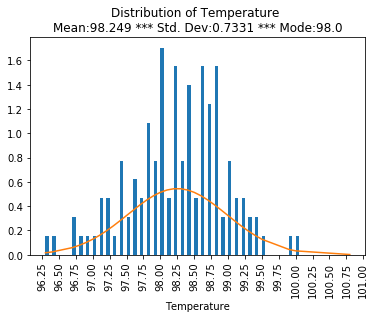

In [16]:
n,bins,patches= plt.hist(temp_observe,bins=bin_values,normed=True,stacked=True)
plt.plot(temp_observe, p)
plt.show()

Now,let's check if the observations follow a Normal Distribution or not using normaltest from </p>

In [17]:
k2,p=scipy.stats.normaltest(temp_observe)

In [18]:
print(p)

0.258747986349


The above p value shows that the observations follow a Normal Distribution

In [19]:
len(df)

130

In [20]:
df[df.temperature.isnull()]

,temperature,gender,heart_rate


There are in total 130 observations in the given dataset.If a sample size is more than 30,then it is considered to be large enough.Therefore,it is safe to say that the sample is large enough.

Each random variable in this sample and population measures the temperature of human which are independent to each other and therefore are independent observations.

The purpose of this exercise is to compare the mean temperature of given sample with generally accepted human body temperature of 98.6 degrees.We have to use a One Sample Significance Test because we compare if a value falls within possible values of a given population parameters.This is not a case where we intervene in a group and check if the group characteristics have changed due to the intervention, if this were the case, we would have used a two-sample test.

To check if the true population $mean(μ)$ is really $98.6$ degrees F, we have to compare if the sample mean$(x̄)$ lies within statistically insignficant range of population mean. The hypothesis test is

$H$o$ = $Population mean(μ)$= $Sample mean(x̄)$

$H$a=  $Population mean(μ) ≠ Sample mean (x̄)$

In this case
    >the sample observations follow a Normal distribution
    >the sample size n is large
    >we do not know the population $standard deviation(σ)$.
    so, we will use a $t statistic$
The t statistic is calculated as  $t = (x̄ - μ) / (S /√n)$.
The two-tailed critical t value for a 95% Confidence Interval and 129 degrees of freedom is approx. $1.980$



To calculate the $t-statistic$

In [21]:
(temp_observe.mean()-98.6) / (temp_observe.std()/math.sqrt(130))

-5.454823292364301

Calculating the t-statistic using $ttest_1samp$ from $scipy.stats$

In [22]:
scipy.stats.ttest_1samp(temp_observe,98.6)

Ttest_1sampResult(statistic=-5.4548232923640771, pvalue=2.4106320415610081e-07)

From the above we can see that the calculated $t-value$ is -5.454 for this sample and is beyond the critical $t-value$ of -1.980.The p value of this is 2.410632.

Therefore,we can reject the $Null$ $Hypothesis$.So, we can conclude that the generally accepted human body temperature is most 
probably $incorrect$.

We would have used the $z-statistic$ if
 1.the sample size was >30
 2.The population standard deviation (σ) is known In this particular problem, the $σ$ is unknown , 
   however, since the sample size is reasonably large (i.e. n= 130), we can approximate $σ$ to the sample standard deviation to be S / √n
   
  The z statistic is calculated as $Z$ = $(X  −  μ0)$ /($S$/√n)
  The ciritical z statistic or, the z statistic for a 95% CI (two tailed) is 1.96. If the calculated z is greater than this, 
  then we can reject $H$o

The $Z-statistic$ would be

In [23]:
(temp_observe.mean()-98.6) / (temp_observe.std()/math.sqrt(130))

-5.454823292364301

Start by computing the margin of error and confidence interval
95% Confidence Interval $t-distribution$ for 129 degrees of freedom critical value is 1.980. 
The confidence interval will be $μ$ ± (talpha X Standard Error)

# 95% Confidence Interval

In [24]:
temp_observe.mean()-(1.980*(temp_observe.std()/math.sqrt(130))),temp_observe.mean()+(1.980*temp_observe.std()/math.sqrt(130))

(98.12190802389173, 98.37655351456979)

Checking the above calculation using scipy.stats.norm.interval method

In [25]:
scipy.stats.norm.interval(0.95,temp_observe.mean(),scipy.stats.sem(temp_observe))

(98.123196428181643, 98.375265110279884)


From the above calculations, anyone whose body temperature is outside the range (98.12, 98.37) can be considered not to be with normal body temperature

In [26]:
len(df[df.gender=='F'])

65

In [27]:
len(df[df.gender=='M'])

65

In [28]:
df_mpop = df[df.gender=='M']
df_mpop.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [29]:
df_fpop=df[df.gender == 'F']
df_fpop.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


Use a Two Sample t test Hypothesis to check if the there is a significant difference in the normal temperature between male and female. Steps:

1.Setup the $H$o - in this case, it will be $Sample Mean$m = $Sample Mean$f

2.Find the mean of the two samples and their difference

3.Find the Standard  Error of the distribution of the differencec in means of these two sample populations

4.Check if the difference in means lies outside the critical value for 95% Confidence Interval; if it does, the null hypothesis can be rejected

In [38]:
mtemp_observe = df_mpop.temperature;ftemp_observe = df_fpop.temperature

In [39]:
mtemp_observe.head(),ftemp_observe.head()

(2     97.8
 5     99.2
 6     98.0
 7     98.8
 12    98.2
 Name: temperature, dtype: float64, 0    99.3
 1    98.4
 3    99.2
 4    98.0
 8    98.4
 Name: temperature, dtype: float64)

Let's find the mean and standard deviation for both the male and female population

In [41]:
mtemp_observe.mean(),ftemp_observe.mean(),ftemp_observe.mean()-mtemp_observe.mean()

(98.1046153846154, 98.39384615384613, 0.289230769230727)

Standard Deviation of both the samples

In [42]:
ftemp_observe.std(),mtemp_observe.std()

(0.7434877527313665, 0.6987557623265908)

The degrees of freedom for n1=n2=30 and Standard Deviation of n1,n2 = (0.7434877527313665, 0.6987557623265908) is 127.5103

The Standard Deviation of the distribution of the difference in these two population;as the population variance is not known,
sample variance is used as an estimate of the populaton variance
Margin of Error is

In [43]:
math.sqrt(mtemp_observe.var()+ftemp_observe.var())

1.0203105673500361

The two-tailed critical $t$ value for a 95% CI and 127 degrees of freedom is approx. 1.980;
if the difference in mean is above the $Standard Error$, i.e. critical $t$ value $*$ Margin of Error then we can reject $H$o

Temperature Difference at the critical t value

In [45]:
1.980*(math.sqrt(mtemp_obs.var()+ftemp_obs.var())/math.sqrt(65))

0.25057682183125635

Since, the observed difference is greater than 95% Confidence Interval,therefore $H$o can be safely rejected.
Therefore,there is a significance difference between Male and Female Body Temperature.

The t-value for the observed difference

In [47]:
(0.289230769230727)/(math.sqrt(mtemp_observe.var()+ftemp_observe.var())/math.sqrt(65))

2.2854345381652736

Validating with scipy.stats.ttest_ind

In [48]:
scipy.stats.ttest_ind(ftemp_obs,mtemp_obs)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)